<a href="https://colab.research.google.com/github/Guerrero-America/MetodosNumericos/blob/main/Polinomio_Interpolante_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***POLINOMIO INTERPOLANTE DE NEWTON***

$Y_k= Y_0 + \binom{k}{1} \cdot \Delta Y_0 + \binom{k}{2} \cdot \Delta^2 Y_0 + \binom{k}{3} \cdot \Delta^3 Y_0 + \cdots + \binom{k}{j} \cdot \Delta^j Y_0 + \binom{k}{k} \cdot \Delta^k Y_0$

In [18]:
# se importan las librerías que se usarán
import numpy as np
import matplotlib.pyplot as plt
import sympy as syp
import scipy.special as spc
from math import *

In [19]:
# Se crean los arreglos con los datos correspondientes a X y a Y=F(X)
F=np.array([-5, 1, 9, 25, 55, 105]) # datos de Y=F(X)
X=np.array([0, 1, 2, 3, 4, 5]) # datos de X

In [20]:
# Definimos el polinomio
def f(x):
    return -5+7*x-2*x**2+x**3

In [25]:
# Se agregaran valores para X
print([f"Se tienen: X: {X} y Y: {F}"])
valores=int(input("Ingrese la cantidad de valores de X que desea: "))
X=np.arange(valores)
F=-5+7*X-2*X**2+X**3
print(f"Ahora se tiene: X: {X} y que F(X)={F}")

['Se tienen: X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] y Y: [  -5    1    9   25   55  105  181  289  435  625  865 1161 1519 1945\n 2445 3025 3691 4449 5305 6265]']
Ingrese la cantidad de valores de X que desea: 10
Ahora se tiene: X: [0 1 2 3 4 5 6 7 8 9] y que F(X)=[ -5   1   9  25  55 105 181 289 435 625]


<function matplotlib.pyplot.show(close=None, block=None)>

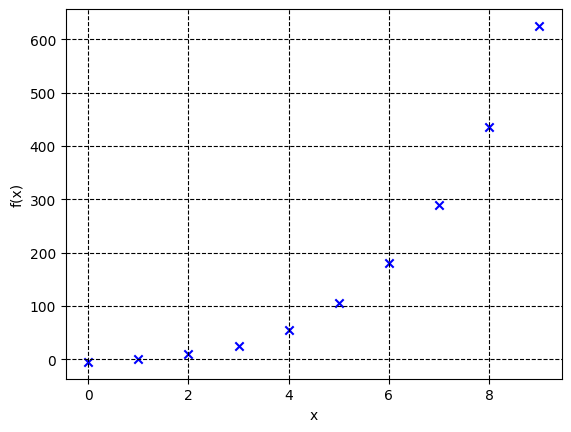

In [26]:
# Graficar datos
plt.scatter(X, F, marker= 'x', color="blue") # se grafican los datos de F con respecto a X
plt.grid(color="Black", linestyle= "--") # cuadricula
plt.xlabel("x") # rotulo
plt.ylabel("f(x)") # rotulo
plt.show # se muestra la grafica

<function matplotlib.pyplot.show(close=None, block=None)>

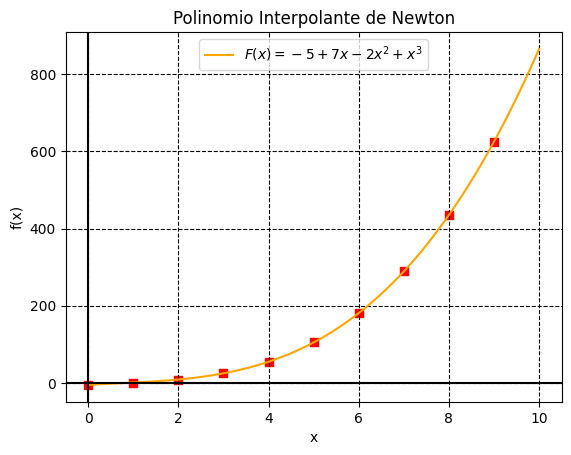

In [27]:
# Graficacion del polinomio y datos de la tabla
x1=np.linspace(0,valores,1000) # se crea el rango del grafico

plt.plot(x1,f(x1), color="orange") # se grafica el polinomio
plt.legend([r"$F(x)=-5 + 7x - 2x^2 + x^3$"]) # leyenda
plt.title("Polinomio Interpolante de Newton") # titulo
plt.scatter(X, F, marker= 's', color="red") # se grafican los datos de F con respecto a X
plt.grid(color="Black", linestyle= "--") # cuadricula
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("x") # rótulo
plt.ylabel("f(x)") # rótulo
plt.show # muestra el grafico

## Se escribirá el algoritmo para encontrar los arreglos conformados por las diferencias (Δ1, Δ2,..., Δk)

In [28]:
## se calcularán las diferencias dentro de un ciclo ##
print(f"X: {X}")
print(f"F: {F}")
D1 = np.diff(F) # se calculan las primeras diferencias
print(f"Δ1: {D1}")
diferencias = [D1]

# Ciclo para calcular las diferencias sucesivas. DifI -> diferencia inicial / DifA -> diferencia actual

i = 2  # Contador para los arreglos D2, D3, etc.
DifI = D1

while True:
# Calcula la siguiente diferencia
    DifA = np.diff(DifI)  # se calculan las diferencias sucesivas
    diferencias.append(DifA)
    print(f"Δ{i}: {DifA}")

# Verifica si todos los elementos del arreglo actual son iguales
    if np.all(DifA == DifA[0]):  # se verifica si todos los elementos son iguales
        print(f"Todos los elementos de Δ{i} son iguales, asi los elementos de Δ{i+1} serán 0. Por lo tanto el polinomio es de grado {i}.")
        break

# Si no todos los elementos son iguales, actualiza el arreglo para la siguiente iteración
    DifI= DifA  # se actualiza el arreglo para la siguiente iteración
    i += 1  # se aumenta el contador para el siguiente arreglo

print("\nArreglos de diferencias generados:")
for idx, arr in enumerate(diferencias, start=1):
    print(f"Δ{idx}: {arr}")

X: [0 1 2 3 4 5 6 7 8 9]
F: [ -5   1   9  25  55 105 181 289 435 625]
Δ1: [  6   8  16  30  50  76 108 146 190]
Δ2: [ 2  8 14 20 26 32 38 44]
Δ3: [6 6 6 6 6 6 6]
Todos los elementos de Δ3 son iguales, asi los elementos de Δ4 serán 0. Por lo tanto el polinomio es de grado 3.

Arreglos de diferencias generados:
Δ1: [  6   8  16  30  50  76 108 146 190]
Δ2: [ 2  8 14 20 26 32 38 44]
Δ3: [6 6 6 6 6 6 6]
